In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [2]:
atmos   = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
(iY, iX) = places.PLACES['Sand Heads']['wind grid ji'] 

In [16]:
iX

151

In [9]:
u_wind2017 = atmos.u_wind.sel(time ='2017', gridX=iX, gridY=iY, method='nearest')
v_wind2017 = atmos.v_wind.sel(time ='2017', gridX=iX, gridY=iY, method='nearest')
u_wind2018 = atmos.u_wind.sel(time ='2018', gridX=iX, gridY=iY, method='nearest')
v_wind2018 = atmos.v_wind.sel(time ='2018', gridX=iX, gridY=iY, method='nearest')
u_wind2019 = atmos.u_wind.sel(time ='2019', gridX=iX, gridY=iY, method='nearest')
v_wind2019 = atmos.v_wind.sel(time ='2019', gridX=iX, gridY=iY, method='nearest')
u_wind2020 = atmos.u_wind.sel(time ='2020', gridX=iX, gridY=iY, method='nearest')
v_wind2020 = atmos.v_wind.sel(time ='2020', gridX=iX, gridY=iY, method='nearest')

In [35]:
start_date = '2017-01-01'
end_date = '2017-12-31'
start_timestamp = pd.Timestamp(start_date)
end_timestamp = pd.Timestamp(end_date)

udata_2017 = atmos.u_wind.sel(time=slice(start_timestamp, end_timestamp))
u_wind2017 = udata_2017.sel(gridX=iX, gridY=iY, method='nearest')
vdata_2017 = atmos.v_wind.sel(time=slice(start_timestamp, end_timestamp))
v_wind2017 = vdata_2017.sel(gridX=iX, gridY=iY, method='nearest')

start_date = '2018-01-01'
end_date = '2018-12-31'
start_timestamp = pd.Timestamp(start_date)
end_timestamp = pd.Timestamp(end_date)

udata_2018 = atmos.u_wind.sel(time=slice(start_timestamp, end_timestamp))
u_wind2018 = udata_2018.sel(gridX=iX, gridY=iY, method='nearest')
vdata_2018 = atmos.v_wind.sel(time=slice(start_timestamp, end_timestamp))
v_wind2018 = vdata_2018.sel(gridX=iX, gridY=iY, method='nearest')

start_date = '2019-01-01'
end_date = '2019-12-31'
start_timestamp = pd.Timestamp(start_date)
end_timestamp = pd.Timestamp(end_date)

udata_2019 = atmos.u_wind.sel(time=slice(start_timestamp, end_timestamp))
u_wind2019 = udata_2019.sel(gridX=iX, gridY=iY, method='nearest')
vdata_2019 = atmos.v_wind.sel(time=slice(start_timestamp, end_timestamp))
v_wind2019 = vdata_2019.sel(gridX=iX, gridY=iY, method='nearest')

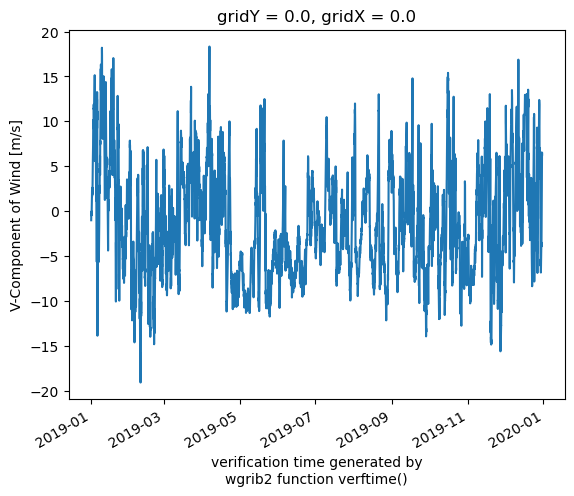

In [36]:
v_wind2019.plot()

In [37]:
along_strait2017 = np.cos(np.deg2rad(29))*v_wind2017 + np.sin(np.deg2rad(29))*u_wind2017
along_strait2018 = np.cos(np.deg2rad(29))*v_wind2018 + np.sin(np.deg2rad(29))*u_wind2018
along_strait2019 = np.cos(np.deg2rad(29))*v_wind2019 + np.sin(np.deg2rad(29))*u_wind2019

In [39]:
along_strait = xr.concat([along_strait2017, along_strait2018,along_strait2019], dim='time')
day_avg_wind = along_strait.resample(time='1D').mean()
day_avg_wind_pd = day_avg_wind.to_dataframe(name='wind')
day_avg_wind_pd = day_avg_wind_pd.drop('gridY',axis=1)
day_avg_wind_pd = day_avg_wind_pd.drop('gridX',axis=1)

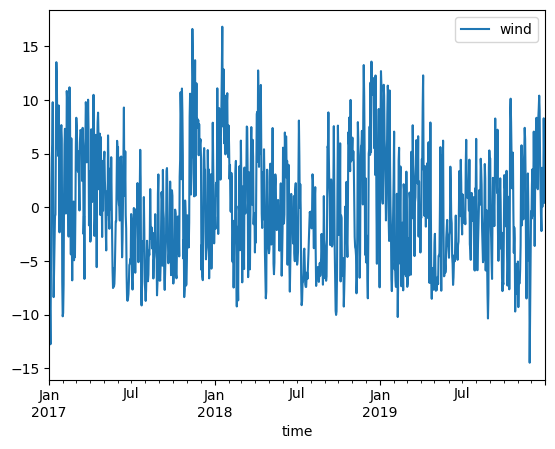

In [40]:
day_avg_wind_pd.plot();

In [41]:
day_avg_wind_pd.to_csv('day_avg_wind.csv')